# Load Packages & Get data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from pandas import datetime
%matplotlib inline
%config IPCompleter.greedy=True

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from scipy.stats import shapiro
import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [0]:
import io
wine_df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))

# Data Exploration

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_df.dtypes
#quality is int64, from 1 to 10 (we can create good and bad wine classifier)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

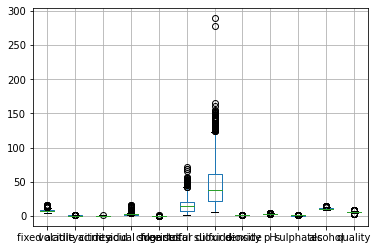

In [8]:
wine_df.boxplot()

apesar de serem dados contínuos, apresentam bastantes outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45b4e22390>,
      dtype=object)

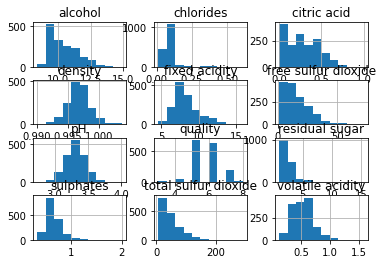

In [9]:
wine_df.hist(bins=10)

In [10]:
from scipy.stats import shapiro
stat1, p1 = shapiro( wine_df['alcohol'])
print(f'alcohol Normality: {stat1, p1}')
stat2, p2 = shapiro( wine_df['chlorides'])
print(f'chlorides Normality {stat2, p2}')
stat3, p3 = shapiro( wine_df['citric acid'])
print(f'citric acid Normality {stat3, p3}')
stat4, p4 = shapiro( wine_df['density'])
print(f'density Normality: {stat4, p4}')
stat5, p5 = shapiro( wine_df['fixed acidity'])
print(f'fixed acidity Normality: {stat5, p5}')
stat6, p6 = shapiro( wine_df['free sulfur dioxide'])
print(f'free sulfur dioxide Normality: {stat6, p6}')
stat7, p7 = shapiro( wine_df['pH'])
print(f'pH Normality: {stat7, p7}')
stat8, p8 = shapiro( wine_df['residual sugar'])
print(f'residual sugar Normality: {stat8, p8}')
stat9, p9 = shapiro( wine_df['sulphates'])
print(f'sulphates Normality: {stat9, p9}')
stat10, p10 = shapiro( wine_df['total sulfur dioxide'])
print(f'total sulfur dioxide Normality: {stat10, p10}')
stat11, p11 = shapiro( wine_df['volatile acidity'])
print(f'volatile acidity Normality: {stat11, p11}')

alcohol Normality: (0.9288389682769775, 6.643664824998876e-27)
chlorides Normality (0.4842468500137329, 0.0)
citric acid Normality (0.9552900195121765, 1.0208196357632134e-21)
density Normality: (0.9908668398857117, 1.9400959061499634e-08)
fixed acidity Normality: (0.942030668258667, 1.5255951637239901e-24)
free sulfur dioxide Normality: (0.9018407464027405, 7.6973984391279615e-31)
pH Normality: (0.993486762046814, 1.7136950418716879e-06)
residual sugar Normality: (0.5660765171051025, 0.0)
sulphates Normality: (0.8330425024032593, 5.821617678881608e-38)
total sulfur dioxide Normality: (0.8732253909111023, 3.5741436086741964e-34)
volatile acidity Normality: (0.9743340611457825, 2.686806772838566e-16)


nenhuma destas distribuições são normais.

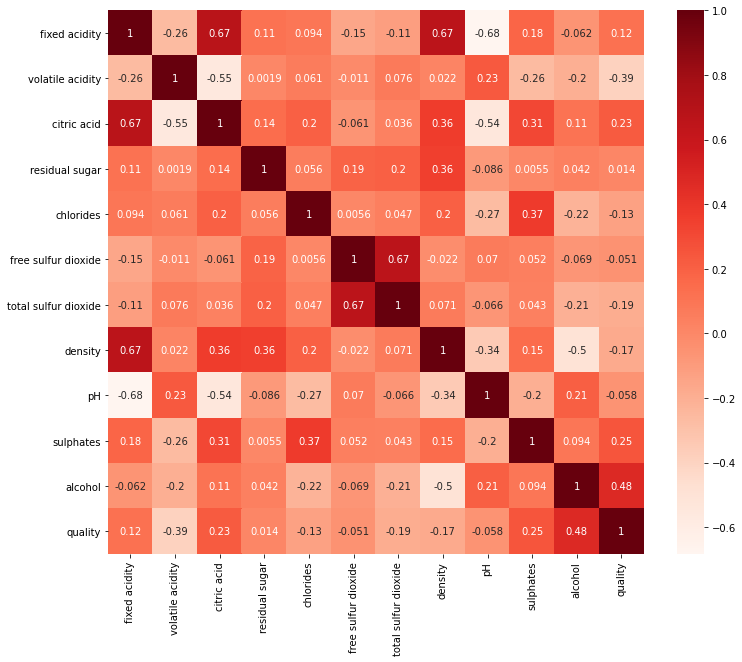

In [11]:
plt.figure(figsize=(12,10))
cor = wine_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
#Correlation with output variable
cor_target = abs(cor["quality"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

quality    1.0
Name: quality, dtype: float64

necessário transformar a quality em 0 (BAD) e 1 (GOOD) para termos melhores resultados

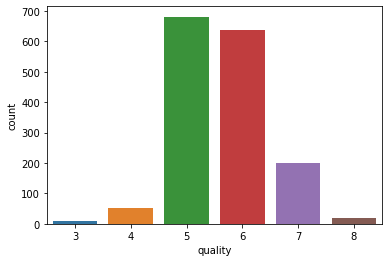

In [13]:
ax = sns.countplot(x="quality", data=wine_df)

In [0]:
reviews = []
for i in wine_df['quality']:
    if i >= 1 and i <= 6:
        reviews.append('0')
    elif i >= 7:
        reviews.append('1')
wine_df['Reviews'] = reviews


In [15]:
wine_df.head()
#0 = BAD
#1 = GOOD

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


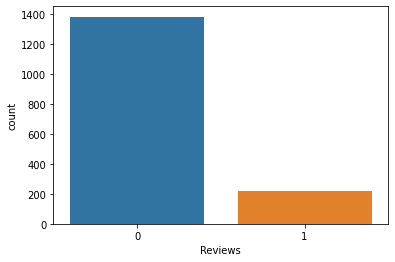

In [16]:
ax = sns.countplot(x="Reviews", data=wine_df)
#label está normalizada (tem 50/50 de bad and good)

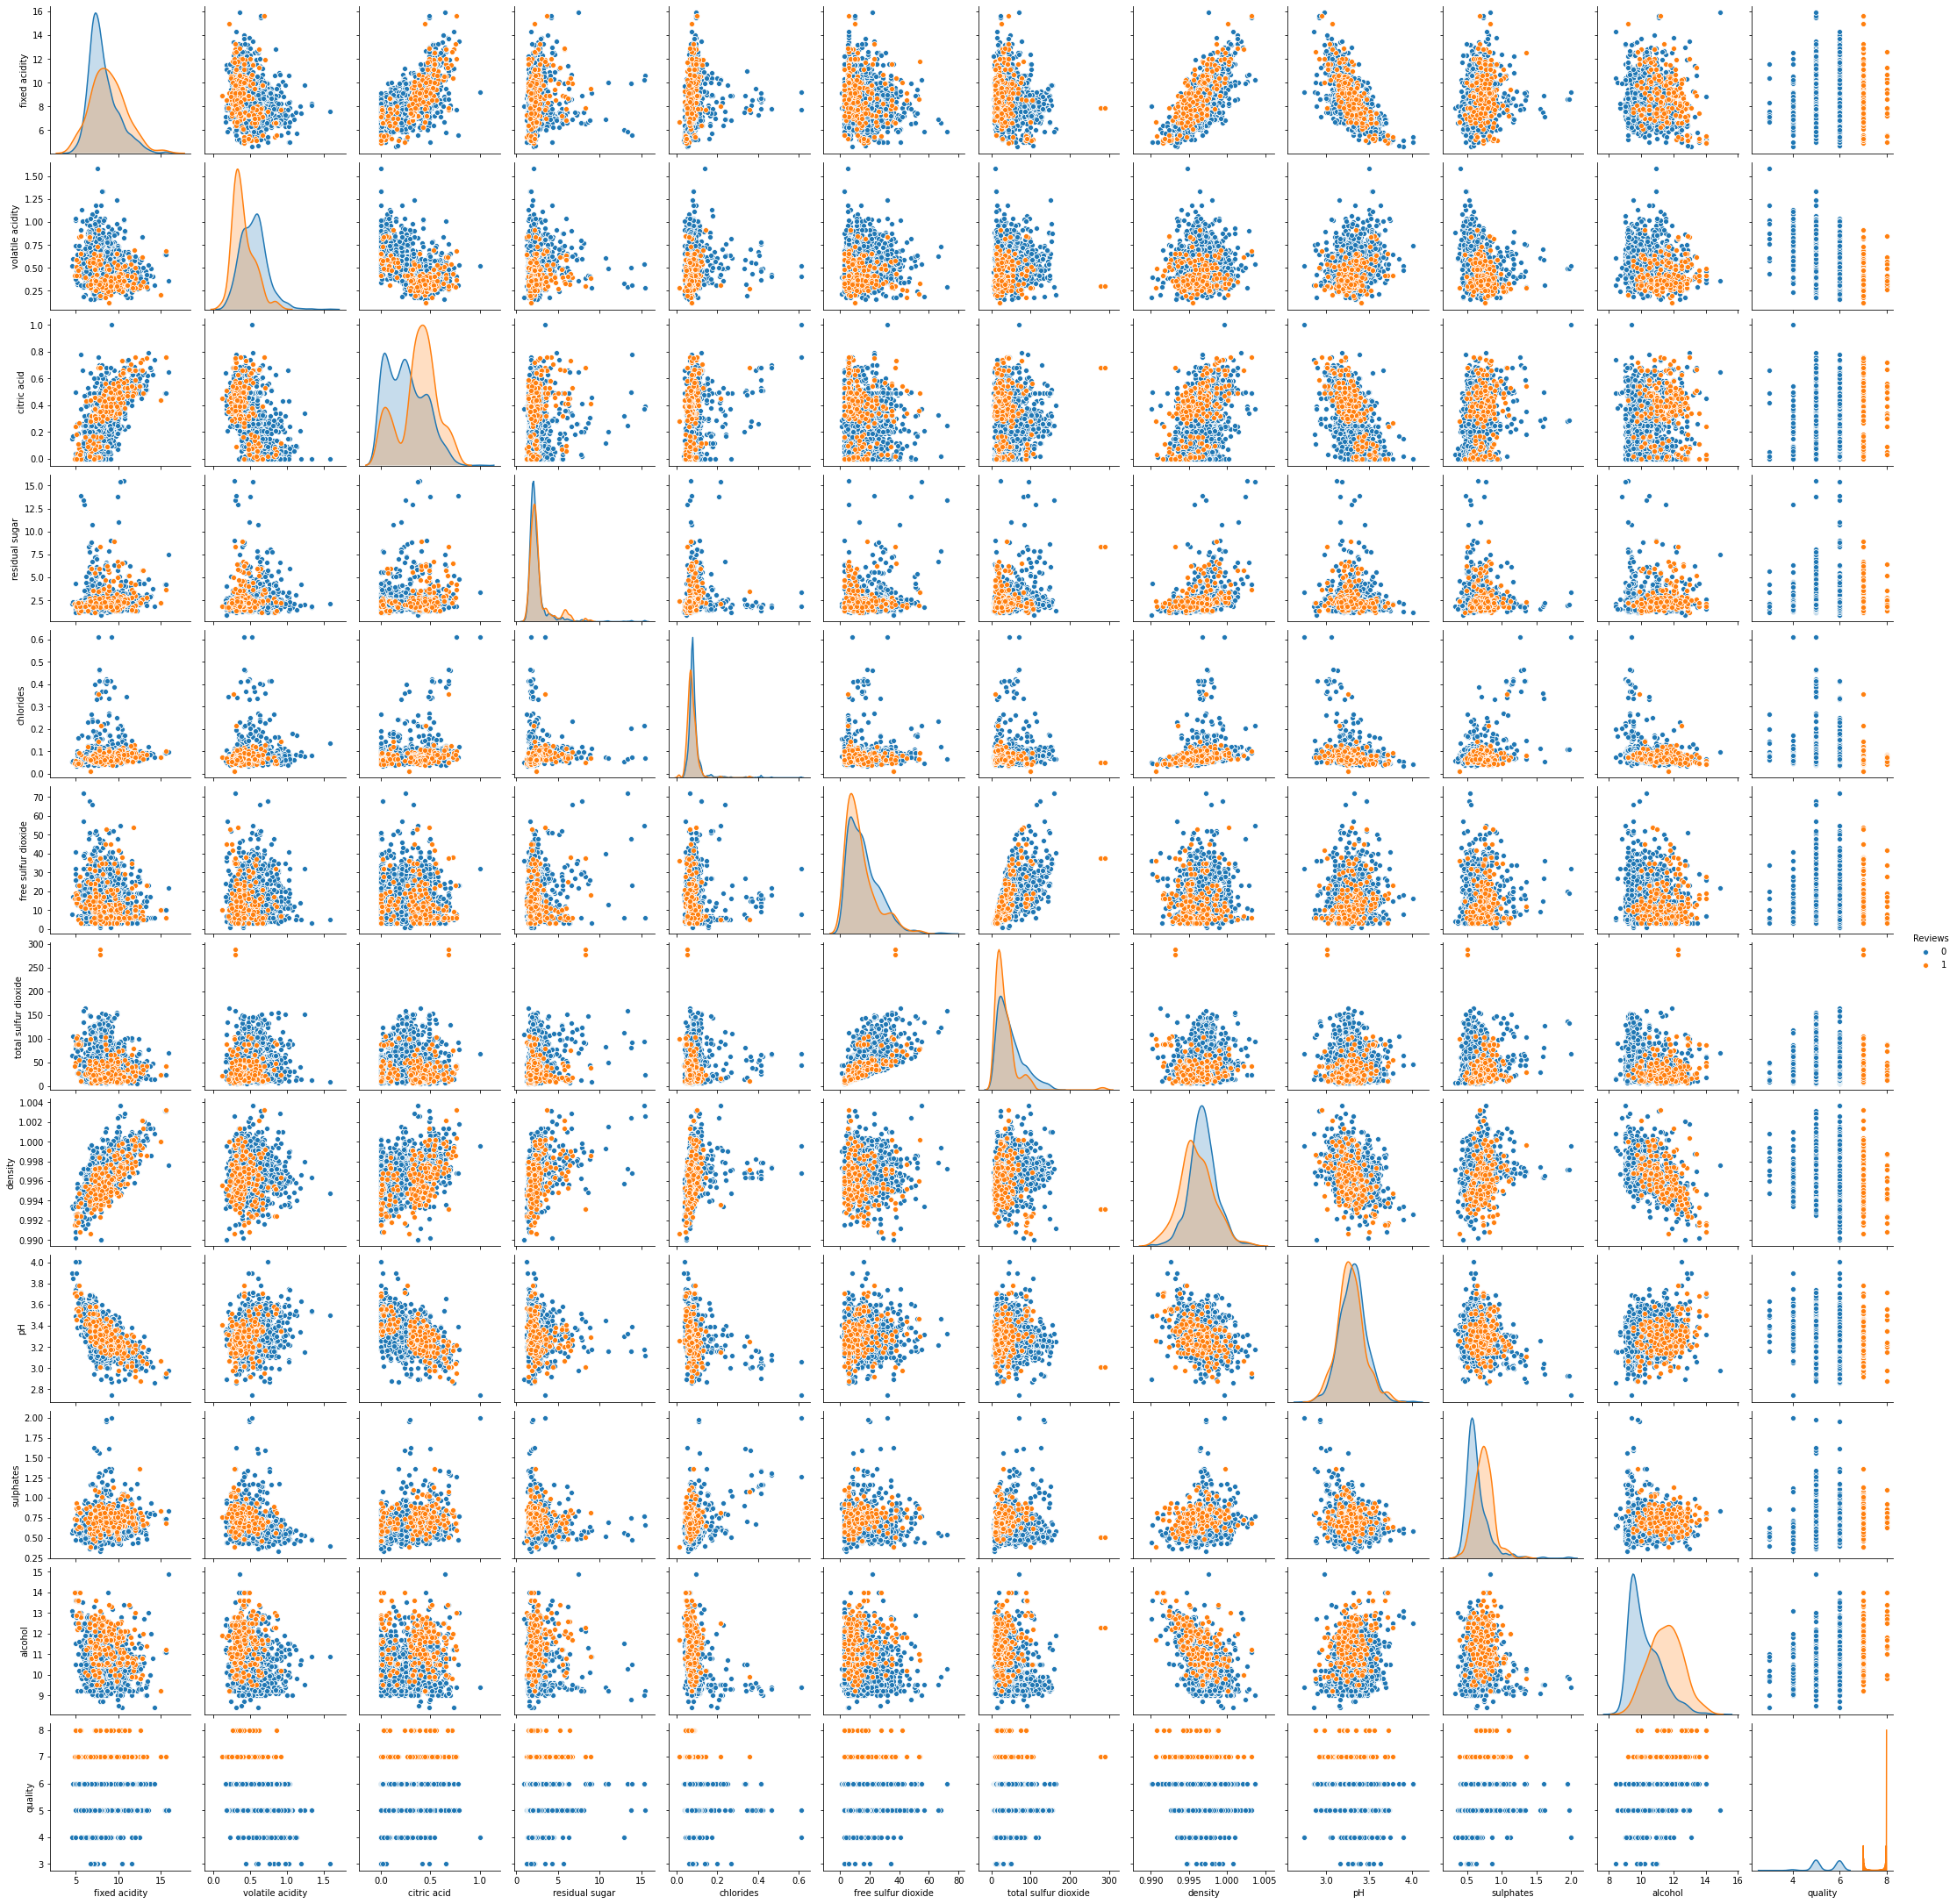

In [0]:
sns.pairplot(data=wine_df, hue="Reviews")

Apesar de transformar a Qualidade em Reviews (0 e 1) não é possível verificar uma discriminação entre grupos. Testaremos duas opções de escolha de features:
1) a label quality fica com dados contínuos e apenas escolhemos as features com >20% de correlação
2) aproveitamos a label review, treinamos o modelo e vemos quais são as features que apresentam maior valor para tomada de decisão

independente da escolha, é necessário limpar os dados (scalar + remove outliers)

# Data Cleansing

In [0]:
wine_df_clean = wine_df.drop(['Reviews', 'quality'], axis=1)

In [0]:
wine_df_try = wine_df

In [0]:
from scipy import stats
wine_df_clean1 = wine_df_clean[(np.abs(stats.zscore(wine_df_clean)) < 3).all(axis=1)]
#esta forma só dá para colunas com valores numéricos

For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint.
Finally, result of this condition is used to index the dataframe.

In [0]:
from scipy import stats
def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, result_type='reduce') \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

#create a function to transform only numerical data into z score and removing all the rows  

In [0]:
drop_numerical_outliers(wine_df_try)

In [22]:
print(f'length before zscore outliers: {len(wine_df_clean)}')
print(f'length after zscore outliers: {len(wine_df_try)}')

length before zscore outliers: 1599
length after zscore outliers: 1451


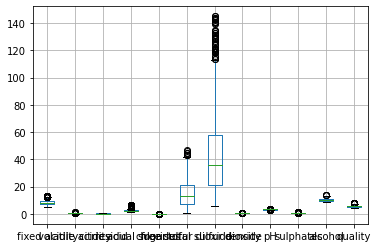

In [23]:
wine_df_try.boxplot()

outliers removidos. utilizar o robustscalar para tornar os dados padronizados

In [0]:
wine_robust_scalar = wine_df_try.drop(['quality', 'Reviews'], axis=1)

In [0]:
wine_without_rb = wine_df_try[['quality', 'Reviews']]

In [26]:
wine_robust_scalar.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [0]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_scaled = scaler.fit_transform(wine_robust_scalar)
robust_scaled_df = pd.DataFrame(robust_scaled, columns=['fixed acidity', 'volatile acidity',
                                                        'citric acid', 'residual sugar', 'chlorides', 
                                                        'free sulfur dioxide', 'total sulfur dioxide', 
                                                        'density',	'pH', 'sulphates',	'alcohol'])

In [0]:
wine = pd.concat([robust_scaled_df, wine_without_rb], 
                            axis=1, 
                            sort=False)

In [30]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
1594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0
1595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0
1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0
1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0
1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0


In [31]:
wine.isna().sum()

fixed acidity           137
volatile acidity        137
citric acid             137
residual sugar          137
chlorides               137
free sulfur dioxide     137
total sulfur dioxide    137
density                 137
pH                      137
sulphates               137
alcohol                 137
quality                 137
Reviews                 137
dtype: int64

In [0]:
wine.dropna(inplace=True)

In [33]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Reviews                 0
dtype: int64

In [34]:
wine_df_try.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Feature Selection

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

wine_df_try2 = wine_df_try.drop(['quality'], axis=1)
X = wine_df_try2.drop(['Reviews'], axis=1)
Y = wine_df_try2['Reviews']

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs       Score
6   total sulfur dioxide  856.486519
5    free sulfur dioxide   62.112362
10               alcohol   26.963225
2            citric acid   10.321190
0          fixed acidity    7.484517
3         residual sugar    6.182995
1       volatile acidity    5.649442
9              sulphates    3.663757
4              chlorides    0.098334
8                     pH    0.054475


In [36]:
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                   Specs       Score
10               alcohol  330.398879
9              sulphates  154.529007
1       volatile acidity  111.978783
2            citric acid   79.185474
6   total sulfur dioxide   44.512347
7                density   34.746925
0          fixed acidity   23.296690
3         residual sugar   20.123366
4              chlorides   18.433934
5    free sulfur dioxide   10.898550
8                     pH    9.124381


Serão eliminadas as colunas que não acrescentam uma linearidade/correlação com as reviews

In [0]:
wine_cleaned = wine.drop(['chlorides','pH','residual sugar', 'quality'], axis=1)

In [38]:
wine_cleaned.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,Reviews
0,-0.238095,0.75,-0.757576,-0.142857,-0.054054,0.500000,-0.352941,-0.50,0
1,-0.047619,1.50,-0.757576,0.857143,0.837838,0.045455,0.352941,-0.25,0
2,-0.047619,1.00,-0.636364,0.142857,0.486486,0.136364,0.176471,-0.25,0
3,1.571429,-1.00,0.939394,0.285714,0.648649,0.590909,-0.235294,-0.25,0
4,-0.238095,0.75,-0.757576,-0.142857,-0.054054,0.500000,-0.352941,-0.50,0


# Training the Model

Treinar o modelo

In [0]:
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Verificou-se que a remoção das colunas que não acrescenta valor para o modelo. apresenta uma accuracy baixíssima.

In [40]:
wine_df_try2.head(3)
#será utilizado este df, pois tem todas as colunas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


In [0]:
x = wine_df_try2.drop(['Reviews'], axis = 1)
y = wine_df_try2['Reviews']

In [0]:
x_train, x_test, y_train, y_test = train_test_split ( x, y , test_size=0.2, random_state=42)

In [43]:
svc_model = LinearSVC()
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)
print(accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test,y_pred_svc))

0.8625429553264605
[[237  10]
 [ 30  14]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.58      0.32      0.41        44

    accuracy                           0.86       291
   macro avg       0.74      0.64      0.67       291
weighted avg       0.84      0.86      0.85       291



In [44]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test,y_pred_knn))

0.852233676975945
[[237  10]
 [ 33  11]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.52      0.25      0.34        44

    accuracy                           0.85       291
   macro avg       0.70      0.60      0.63       291
weighted avg       0.82      0.85      0.83       291



In [45]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred_gnb = gnb_model.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

0.8350515463917526
[[216  31]
 [ 17  27]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       247
           1       0.47      0.61      0.53        44

    accuracy                           0.84       291
   macro avg       0.70      0.74      0.71       291
weighted avg       0.86      0.84      0.84       291



In [46]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train, y_train)
y_pred_dtree = dtree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_dtree))
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

0.8797250859106529
[[229  18]
 [ 17  27]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       247
           1       0.60      0.61      0.61        44

    accuracy                           0.88       291
   macro avg       0.77      0.77      0.77       291
weighted avg       0.88      0.88      0.88       291



In [47]:
from sklearn.ensemble import RandomForestClassifier
randforest = RandomForestClassifier()
f_randforest = randforest.fit(x_train, y_train)
y_pred_randforest = f_randforest.predict(x_test)
print(accuracy_score(y_test, y_pred_randforest))
print(confusion_matrix(y_test, y_pred_randforest))
print(classification_report(y_test, y_pred_randforest))

0.9175257731958762
[[243   4]
 [ 20  24]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       247
           1       0.86      0.55      0.67        44

    accuracy                           0.92       291
   macro avg       0.89      0.76      0.81       291
weighted avg       0.91      0.92      0.91       291



In [48]:
#accuracy metric was already done
#now to cross_val_score metric
randforest = RandomForestClassifier()
randforest_cvs = cross_val_score(randforest, x, y, cv = 10)
print (randforest_cvs)
print (randforest_cvs.mean())

[0.88356164 0.91034483 0.88965517 0.87586207 0.90344828 0.86206897
 0.84827586 0.90344828 0.86896552 0.90344828]
0.8849078885214926


In [49]:
#AUC metric
from sklearn.metrics import roc_curve, auc, roc_auc_score
roc_auc_score(y_test, y_pred_randforest)

0.7646301067353699

In [50]:
#cross validation for AUC metric
rfc_cv_score = cross_val_score(randforest, x, y, cv=10, scoring='roc_auc')
print(rfc_cv_score.mean())

0.8716685714285713


In [59]:
#log loss metric for rfc
scores_log = cross_val_score(randforest, x, y, cv=10, scoring='neg_log_loss')
print(scores_log, scores_log.mean())

[-0.50082225 -0.22918186 -0.26507985 -0.26783439 -0.44342    -0.30102666
 -0.3386834  -0.28733535 -0.25611141 -0.326374  ] -0.3215869158172645


# GridSearch

In [61]:
model = RandomForestClassifier()  
# defining parameter range 
param_grid = {'n_estimators': [200, 300, 500],  
              'max_depth': [5, 10, 15], 
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf': [5, 10, 15]}  
# n_estimators: The number of trees in the forest.
# max_depth: The maximum depth of the tree
# min_samples_split: The minimum number of samples required to split an internal node
# min_samples_lead: describe the minimum number of samples of samples at the leafs, the base of the tree.
# verbose. Quantidade de mensagens sobre o for loop best parameter
# refit. true by default
grid = GridSearchCV(model, param_grid, refit = True, verbose = 1) 
grid.fit(x_train, y_train) 
grid_predictions = grid.predict(x_test) 

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  4.3min finished


In [69]:
from sklearn.metrics import log_loss
print(f'best parameters for the model: {grid.best_params_}') 
print('\n')
print("=== Accuracy Score Metric ===")
print(f'{accuracy_score(y_test, grid_predictions)}')
print('\n')
print("=== Confusion Matrix ===")
print(f'{confusion_matrix(y_test, grid_predictions)}')
print('\n')
print("=== Classification Report ===")
print(f'{classification_report(y_test, grid_predictions)}') 
print('\n')
print("=== AUC Scores ===")
print(f'{roc_auc_score(y_test, grid_predictions)}')
print('\n')

best parameters for the model: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}


=== Accuracy Score Metric ===
0.9003436426116839


=== Confusion Matrix ===
[[243   4]
 [ 25  19]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       247
           1       0.83      0.43      0.57        44

    accuracy                           0.90       291
   macro avg       0.87      0.71      0.76       291
weighted avg       0.89      0.90      0.89       291



=== AUC Scores ===
0.7078119249171881


=== LogLoss Scores ===
3.442019635196326


In [85]:
from sklearn.ensemble import RandomForestClassifier
randforest = RandomForestClassifier(max_depth = 10, min_samples_leaf = 5, min_samples_split = 10, n_estimators= 500)
f_randforest = randforest.fit(x_train, y_train)
y_pred_randforest = f_randforest.predict(x_test)
print(accuracy_score(y_test, y_pred_randforest))
print(confusion_matrix(y_test, y_pred_randforest))
print(classification_report(y_test, y_pred_randforest))

0.8969072164948454
[[243   4]
 [ 26  18]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       247
           1       0.82      0.41      0.55        44

    accuracy                           0.90       291
   macro avg       0.86      0.70      0.74       291
weighted avg       0.89      0.90      0.88       291



# Save Model (Pickle)

In [0]:
#guardar o modelo com 90% forestrandom
import pickle
pickle.dump(randforest, open( "randomforest_model.pkl", "wb" ) )

In [0]:
#voltar a trazer o modelo
wine_prediction = pickle.load( open( "randomforest_model.pkl", "rb" ) )

In [101]:
wine_df_try2.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Reviews
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [100]:
#testar o prediction do modelo
print(wine_prediction.predict([[7.4, 0.7, 0, 1.9, 0.076, 11.0, 34.0, 0.99780, 3.51, 0.56, 9.4]]))

['0']


# Training model without feature engineering

Apesar de remover colunas que não apresentassem uma linearidade com as reviews, o modelo apresentava accuracy significativamente mais baixa. Posto isto optei por utilizar todas as colunas e dividir a qualidade do vinho em 2: Razoável/Mau: 0 e Bom: 1. Defini que o threshold seria mais alto para os vinhos razoáveis/maus. Desta forma obti um modelo que detetaria vinhos Bons para o consumidor.

No entanto vou utilizar a quality column without transformation para fazer treinar o modelo a fim de verificar se o modelo teria melhores resultados.

In [0]:
wine_df_try3 = wine_df_try.drop(['Reviews'], axis=1)

In [0]:
wine_df_try3.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
x = wine_df_try3.drop(['quality'], axis = 1)
y = wine_df_try3['quality']

In [0]:
x_train, x_test, y_train, y_test = train_test_split ( x, y , test_size=0.2, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier
randforest = RandomForestClassifier()
f_randforest = randforest.fit(x_train, y_train)
y_pred_randforest = f_randforest.predict(x_test)
print(accuracy_score(y_test, y_pred_randforest))
print(confusion_matrix(y_test, y_pred_randforest))
print(classification_report(y_test, y_pred_randforest))

0.697594501718213
[[ 0  7  3  1  0]
 [ 0 89 30  1  0]
 [ 0 25 89  2  0]
 [ 0  4 11 25  0]
 [ 0  0  1  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.71      0.74      0.73       120
           6       0.66      0.77      0.71       116
           7       0.78      0.62      0.69        40
           8       0.00      0.00      0.00         4

    accuracy                           0.70       291
   macro avg       0.43      0.43      0.43       291
weighted avg       0.67      0.70      0.68       291



Como verificado, a opção de usar a quality column não transformada dá resultados insatisfatórios, comparativamente à coluna reviews binária